In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [2]:
#cd /home/roberto/Desktop/romain_ic/wavemixing_project/src

In [3]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonian_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [4]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonian.hamiltonian_builder import *
from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from single_and_double_excitations_subspace.QRT_dynamics_ODE import *

from post_processing.local_calculations import *
from helper_functions.cloud import *
from helper_functions.operators import *
from helper_functions.other import * 

In [5]:
N = 5
N_atoms = N

b0 = 0.1

repeat = False
if repeat == False:
    r = random_cloud(0, N, exc_radius = None, b0 = b0)

### Subspace solutions

In [6]:
R1 = get_nhat_from_angle(25)
R2 = get_nhat_from_angle(205)

tf = 1
Delta = 20
t_span, dt = np.linspace(0,tf,100, retstep = True) 

Exact:

In [7]:
taulist = t_span 

Omega_list = np.arange(0.5,6,0.8)

g2_12_by_omega_exact = np.zeros(len(Omega_list), dtype = "object")
g2_11_by_omega_exact = np.zeros(len(Omega_list), dtype = "object")


for i in range(len(Omega_list)):
    Omega = Omega_list[i]
    S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = b0, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r, beam = "gaussian")
    rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  0, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)

    g2_12_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R2, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
    g2_11_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R1, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
    
    g2_12_by_omega_exact[i] = g2_12_exact
    g2_11_by_omega_exact[i] = g2_11_exact

b0 system 0.1
kd system None
r is an array
b0 system 0.1
kd system None
r is an array
b0 system 0.1
kd system None
r is an array
b0 system 0.1
kd system None
r is an array
b0 system 0.1
kd system None
r is an array
b0 system 0.1
kd system None
r is an array
b0 system 0.1
kd system None
r is an array


QRT

In [8]:
g2_12_by_omega_QRT = np.zeros(len(Omega_list), dtype = "object")
g2_11_by_omega_QRT = np.zeros(len(Omega_list), dtype = "object")


S_sigmam_i_expectations = None
S_sigmam_ij_expectations = None

for i in range(len(Omega_list)):
    Omega = Omega_list[i]
    Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True, beam = "gaussian")
    Beta1D, Beta2D, t_span, r = SolveForBeta1DandBeta2D_tau_QRT(N, kd = None , b0 = None, exc_radius = None, Delta = Delta , Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, taulist=t_span, Sm_1D = S_sigmam_i_expectations, Sm_2D = S_sigmam_ij_expectations )  

    g2_12_QRT = g2_dynamics_subspace_approach( r, R1, R2, taulist, Beta1D, Beta2D)
    g2_11_QRT = g2_dynamics_subspace_approach( r, R1, R1, taulist, Beta1D, Beta2D)
    
    g2_12_by_omega_QRT[i] = g2_12_QRT[0]
    g2_11_by_omega_QRT[i] = g2_11_QRT[0]
    
    print(Omega,np.average((g2_12_by_omega_QRT[i]-g2_12_by_omega_exact[i])))

0.5 -0.8222034507403486
1.3 -0.936037800312277
2.1 -1.1049113308264504
2.9000000000000004 -1.2765502360750824
3.7 -1.4215818557998656
4.5 -1.5320293032037078
5.300000000000001 -1.6111957267152892


Calculate errors

In [9]:
error_g12_QRT_with_exact = [np.average(g2_12_by_omega_QRT[i]-g2_12_by_omega_exact[i]) for i in range(len(Omega_list))]
error_g11_QRT_with_exact = [np.average(g2_11_by_omega_QRT[i]-g2_11_by_omega_exact[i]) for i in range(len(Omega_list))]

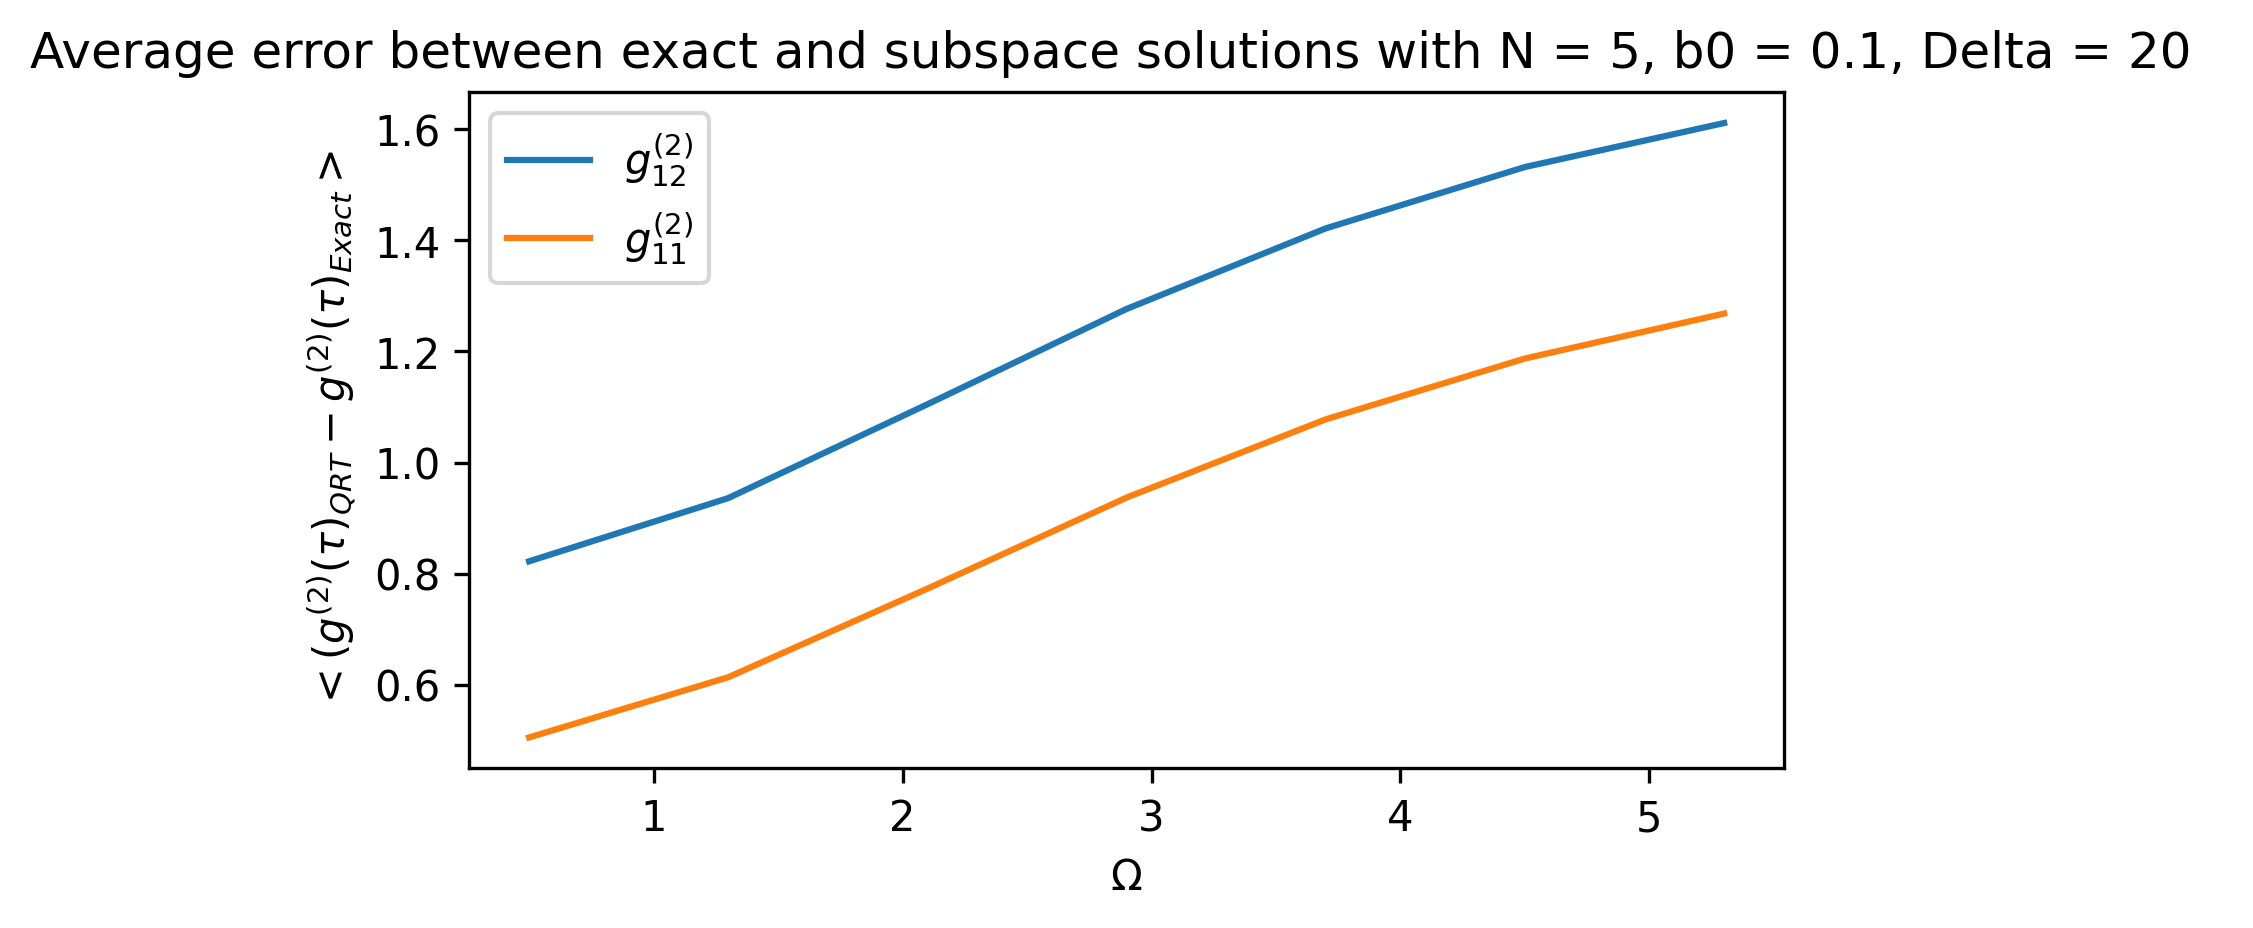

In [10]:
fig = plt.figure(figsize=(5, 3), dpi=300)
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3), dpi=300, sharex=True, sharey=True)

#plt.ylim(-0.2,14)
#plt.set_title("Mixed correlation")
plt.plot(Omega_list, np.abs(error_g12_QRT_with_exact), label = '$g^{(2)}_{12}$')
plt.plot(Omega_list, np.abs(error_g11_QRT_with_exact), label = '$g^{(2)}_{11}$')



plt.title(f"Average error between exact and subspace solutions with N = {N}, b0 = {b0}, Delta = {Delta}  ")

plt.tight_layout()
plt.xlabel(r"$\Omega$")
plt.ylabel(r"$ <(g^{(2)}(\tau)_{QRT} - g^{(2)}(\tau)_{Exact}>  $")
plt.legend()

In [11]:
g2_12_by_omega_QRT[0]

array([0.4413721 , 0.46338304, 0.51044582, 0.5800554 , 0.66875032,
       0.77239075, 0.88631712, 1.00544445, 1.12480741, 1.23963873,
       1.34530611, 1.43718425, 1.51260709, 1.56872531, 1.60285568,
       1.61364124, 1.60108441, 1.56646893, 1.51219088, 1.44111723,
       1.35590413, 1.25958343, 1.15571315, 1.04844962, 0.94250771,
       0.84302033, 0.75427254, 0.67863203, 0.61929284, 0.57856067,
       0.55785043, 0.55765637, 0.57743656, 0.6155007 , 0.66978435,
       0.73790237, 0.81694895, 0.90362537, 0.99426064, 1.08474987,
       1.17058799, 1.24919157, 1.31743042, 1.37229991, 1.41167038,
       1.43429575, 1.43975274, 1.42832595, 1.40120378, 1.35974395,
       1.30519754, 1.23946114, 1.16513424, 1.08550988, 1.00450432,
       0.92638359, 0.85343774, 0.788362  , 0.7337987 , 0.69182714,
       0.66397407, 0.65116663, 0.65363925, 0.67074443, 0.70116644,
       0.74366084, 0.79651496, 0.8575573 , 0.92416524, 0.99322419,
       1.06105258, 1.125105  , 1.18338634, 1.23327577, 1.27274

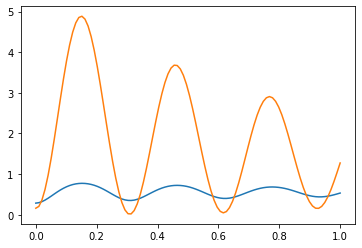

In [12]:
plt.plot(taulist, g2_12_by_omega_QRT[3], label = '$g^{(2)}_{12}$')
plt.plot(taulist, g2_12_by_omega_exact[3], label = '$g^{(2)}_{12}$')
